#                             Online Payments Fraud Detection

## Probelm Definition

Also known as BB PLC, Blossom Bank is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London. Blossom Bank has recently detected some fraudulent transactions on its network and is looking to solve this problem using a machine learning alogrithm.


## Aim and Objective
The aim of this project is to help Blossom bank identify relationships between the given data, find the best machine learning algorithm to help them detect fraudulent transactions on their network. This project will benefit Blossom bank identify the best algorithm for the job, identify the best metrics to keep in mind and to also identify further steps they would need to take based on the model selection.

## Project Benefits

##### Initially, this project will help the bank:
Identify the best algorithm for the job, 
Identify the best metrics to keep in mind,
Identify further steps they would need to take based on the model selection.

##### Once the model is completed, the end benefits will be:
Better security for customer fund,
Increased trust in the bank by the customers,
Confidence to expand services knowing well that fraud will not be a problem. This will in turn help profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [2]:
df_fraud = pd.read_csv(r'C:\Users\User\Dropbox\My PC (9470m)\Desktop\Data Science\PYTHON\Machine Learning\Capstone\Online Payment Fraud Detection.csv')

## Data Inspection

In [3]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
df_fraud.shape

(1048575, 10)

In [15]:
df_fraud.isnull().any()

step                False
type                False
amount              False
sender              False
sender_OldBal       False
sender_NewBal       False
recipient           False
recipient_OldBal    False
recipient_NewBal    False
isFraud             False
class_amt           False
dtype: bool

## Data Cleaning

In [6]:
df_fraud.rename(columns={'nameOrig':'sender','oldbalanceOrg':'sender_OldBal','newbalanceOrig':'sender_NewBal',
                         'nameDest':'recipient','oldbalanceDest':'recipient_OldBal','newbalanceDest':'recipient_NewBal'}, 
                          inplace =True)
df_fraud.head()

,step,type,amount,sender,sender_OldBal,sender_NewBal,recipient,recipient_OldBal,recipient_NewBal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Column Dictionary
step: represents a unit of time where 1 step equals 1hour

type: type of online transaction

amount: the amount of the transaction

sender: customer starting the transaction

sender_oldbal: balance before the transaction

sender_newbal: balance after the transaction

recipient: recipient of the transaction

recipient_oldbal: initial balance of recipient before the transaction

recipient_newbal: the new balance of the recipient after the transaction

isFraud: fraud transaction(target column)

In [7]:
df_fraud.isFraud.replace(1, 'Fraud', inplace=True)
df_fraud.isFraud.replace(0, 'No Fraud', inplace=True)

# Exploratory Data Analysis (EDA)
## Univariate Analysis

In [8]:
df_fraud['isFraud'].unique()

array(['No Fraud', 'Fraud'], dtype=object)

isFraud is our target column and has two unique values namely 'Fraud' and 'No Fraud'

In [9]:
df_fraud.isFraud.value_counts(normalize=True)

No Fraud    0.998911
Fraud       0.001089
Name: isFraud, dtype: float64

99.9% of the transactions are not fraudulent while 0.1% are fraudulent

Text(0, 0.5, 'Count')

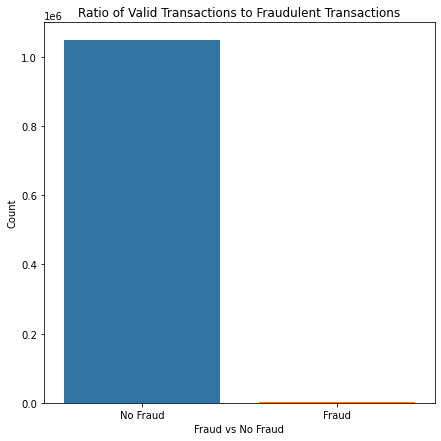

In [10]:
plt.figure(figsize=(7,7))
plt.title('Ratio of Valid Transactions to Fraudulent Transactions')
sns.countplot(x='isFraud', data=df_fraud)
plt.xlabel('Fraud vs No Fraud')
plt.ylabel('Count')

From the chart, we can see that most of the transactions are non-fraudulent.We can barely see the 0.1% fraudulent transactions.

Text(0, 0.5, 'Count')

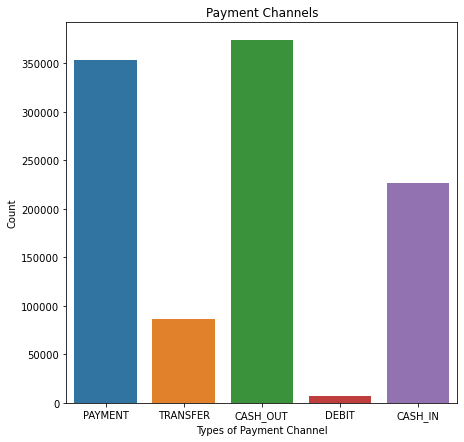

In [11]:
plt.figure(figsize=(7,7))
plt.title('Payment Channels')
sns.countplot(x='type', data=df_fraud)

plt.xlabel('Types of Payment Channel')
plt.ylabel('Count')

Most of the transactions made were with the type 'cash out' and 'payment' which should be similar to P.O.S. The least used means was 'Debit'.

## Bivariate Analysis

Text(0, 0.5, 'Count')

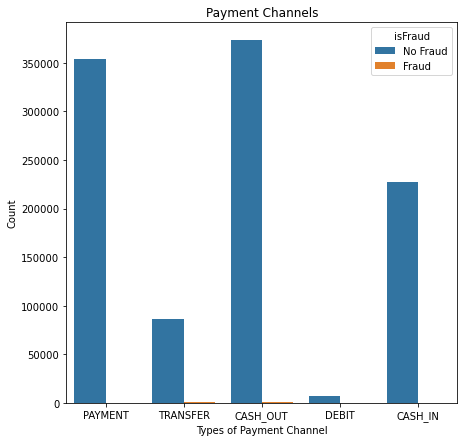

In [12]:
plt.figure(figsize=(7,7))
plt.title('Payment Channels')
sns.countplot(x='type', data=df_fraud, hue = 'isFraud')

plt.xlabel('Types of Payment Channel')
plt.ylabel('Count')

With close attention, we can see that most of the fraudulent transactions were made via 'Transfer' and 'Cash Out' payment channels.

#### For the next EDA, I will create a function that groups the contents in the 'amount' column so that it is easy to visualise:

Text(0.5, 1.0, 'Type of Payment by Amount Classification')

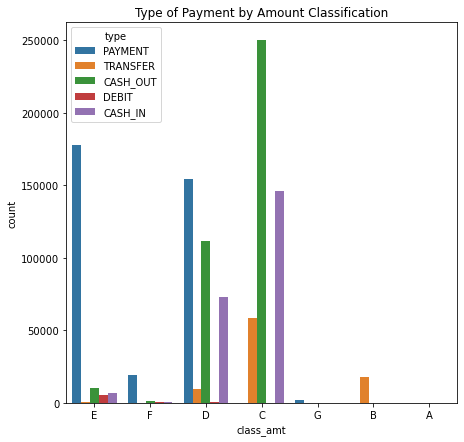

In [17]:
def amt_class(x):

    if x >= 5000000: 
        return 'A'
    elif x >= 1000000:
        return 'B'
    elif x >= 100000: 
        return 'C'
    elif x >= 10000:
        return 'D'
    elif x >= 1000:
        return 'E'
    elif x >= 100:
        return 'F'
    else:
        return 'G'
    
df_fraud['class_amt'] = df_fraud['amount'].apply(amt_class)

plt.figure(figsize=(7,7))
sns.countplot(x='class_amt', data=df_fraud, hue='type')
plt.title('Type of Payment by Amount Classification')

Most of the transactions were done via the 'Cash Out' method and many of them are in class C of the amounts transacted. This class is made up of amounts between 1 million and 10 million. The second highest transaction type is the 'Payment' which I would consider to be similar to the P.O.S. method. These can be linked to much smaller payment amounts 10,000 and lower. This makes sense as with a P.O.S terminal most people transact around that much.

## Multivariate Analysis

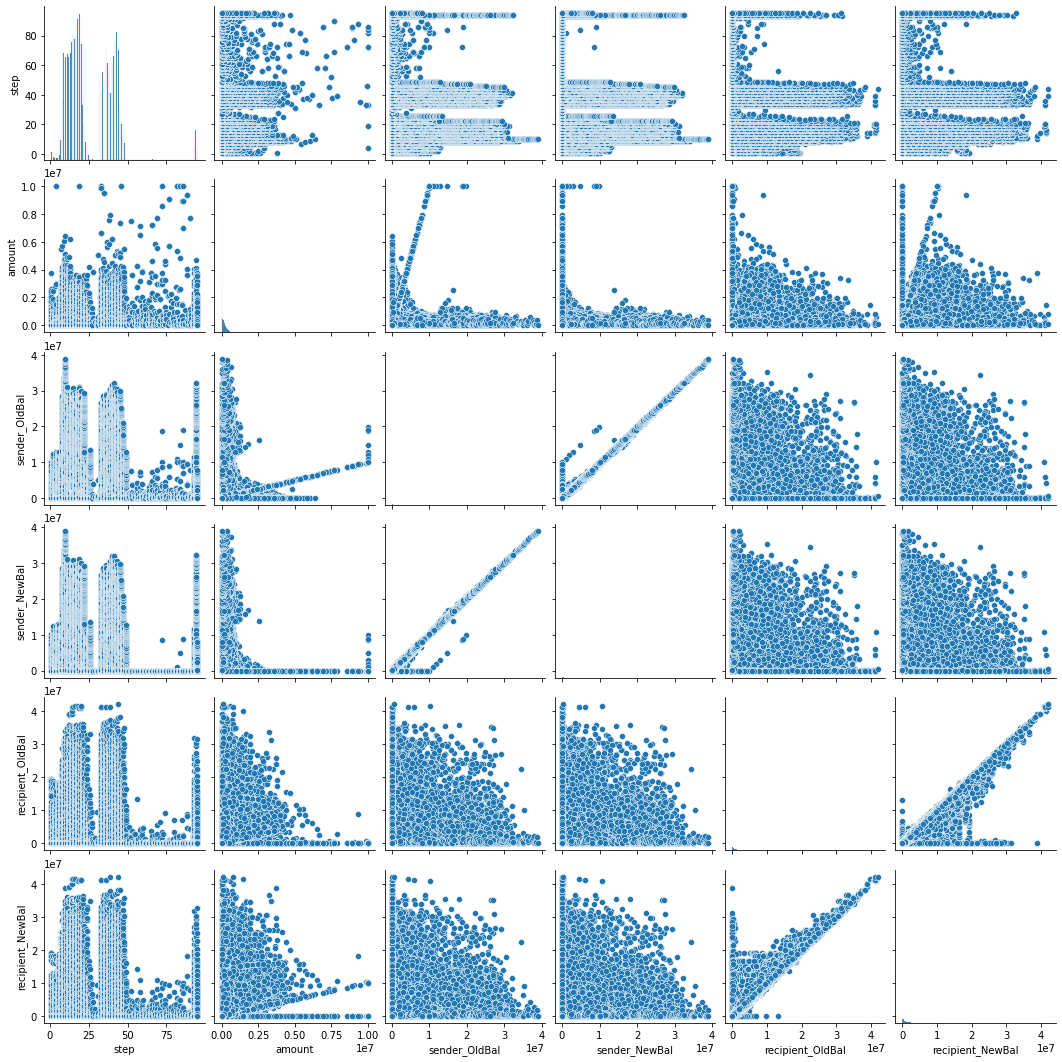

In [13]:
sns.pairplot(df_fraud)

Text(32.09374999999999, 0.5, 'Count')

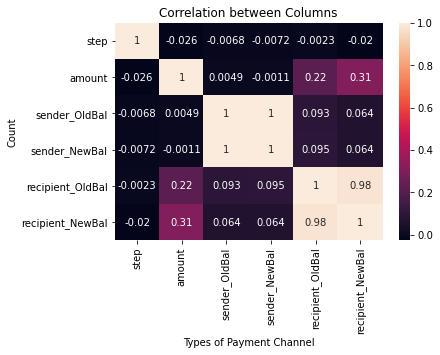

In [14]:
corel = df_fraud.corr()
sns.heatmap(corel,annot=True)
plt.title('Correlation between Columns')
plt.xlabel('Types of Payment Channel')
plt.ylabel('Count')

 Looking at both multivariate charts, we can see that there's a lack of correlation between the columns in this data. However, there is some correlation between amount and bank balances. This correlation however is not very strong.

## Feature Engineering

As the sender and recipient ID are not important, we drop them from the data:

In [15]:
df_fraud = df_fraud.drop("sender", axis=1)

In [16]:
df_fraud = df_fraud.drop("recipient", axis=1)

In [16]:
df_fraud = df_fraud.drop("class_amt" , axis=1)

 After dropping the 'sender' and 'recipient' column, the only column with an object left is the 'type' column:

In [17]:
categorical = ['type']

In [18]:
categories_dumies = pd.get_dummies(df_fraud[categorical])
categories_dumies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [19]:
print(df_fraud.shape)

(1048575, 8)


In [20]:
df_fraud = pd.concat([df_fraud,categories_dumies],axis=1)
print (df_fraud.shape)

(1048575, 13)


In [21]:
df_fraud.head()

,step,type,amount,sender_OldBal,sender_NewBal,recipient_OldBal,recipient_NewBal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,Fraud,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Fraud,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0,0,0,1,0


In [22]:
df_fraud = df_fraud.drop(categorical, axis=1)
df_fraud.head()

,step,amount,sender_OldBal,sender_NewBal,recipient_OldBal,recipient_NewBal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,Fraud,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0,0,0,1,0


## MODELLING

In [23]:
y = df_fraud.isFraud
X = df_fraud.drop('isFraud', axis = 1)

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45)

In [26]:
LR = LogisticRegression()

In [27]:
KN = KNeighborsClassifier()

In [28]:
DC = DecisionTreeClassifier()

In [29]:
RF = RandomForestClassifier()

In [30]:
models = [LR, KN, DC, RF]

In [31]:
from sklearn import metrics
def cm_plt (y_test,prediction):

    cm = metrics.confusion_matrix(y_test,prediction)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

    cm_display.plot()
    plt.title('Confusion Matrix')
    plt.show()

In [32]:
def trainer (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    cm_plt(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9988513517809345 

              precision    recall  f1-score   support

       Fraud       0.46      0.29      0.36       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.73      0.64      0.68    471859
weighted avg       1.00      1.00      1.00    471859



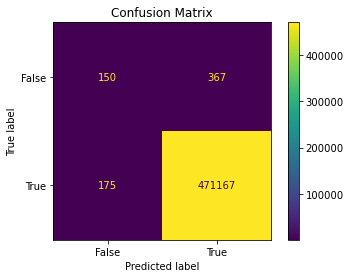


For KNeighborsClassifier, Accuracy score is 0.9993260698640908 

              precision    recall  f1-score   support

       Fraud       0.80      0.52      0.63       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.90      0.76      0.81    471859
weighted avg       1.00      1.00      1.00    471859



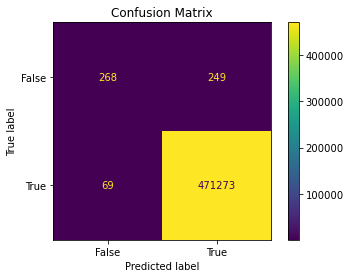


For DecisionTreeClassifier, Accuracy score is 0.9996312457746912 

              precision    recall  f1-score   support

       Fraud       0.86      0.79      0.82       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.93      0.90      0.91    471859
weighted avg       1.00      1.00      1.00    471859



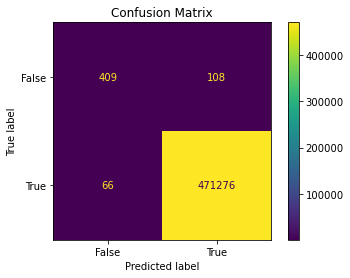


For RandomForestClassifier, Accuracy score is 0.9997350903553816 

              precision    recall  f1-score   support

       Fraud       0.97      0.78      0.87       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.99      0.89      0.93    471859
weighted avg       1.00      1.00      1.00    471859



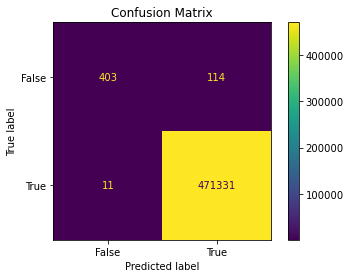

In [33]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

## Result Interpretation
The result gives us the accuracy, precision, recall and confusion matrix of each model.

Accuracy: this tells us how often our model is correct and we can see that the most accurate model is the Random Forest Classifier at 99.97% having 471,276 of the sample prediction correct. However, accuracy on its own is not a good enough means of evaluation.

Precision: this tells how many of the positive prediction really are positive i.e. how many detected items from the data are truly relevant. Again, the Random Forest has the highest precision score at 97%. Interestingly, Logistic Regression which had a fantastic accuracy score of 99.88% has a disappointing precision score of 46%. This is an example of why accuracy as a single metric is poor.

Recall: this tells us how well the model is able to predict positives i.e. how many of the relevant items from the data are detected by the model. It looks at both true positives and false negatives. This time, the Decision Tree Classifier had the highest recall score of 79% with the RandomForest Classifier close by with recall score of 78%. However, a 1% difference does not qualify Decision Tree as the better model because considering all three metrics, Random Forest is far ahead with an 11% difference in precision score and a slightly higher accuracy score.

## Model Cross-Validation using K-Fold

In [34]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [38]:
def trainer_mcv(model,X,y):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    print(classification_report(y_test,prediction))
    cm_plt(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9989249478819904 

              precision    recall  f1-score   support

       Fraud       0.46      0.29      0.36       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.73      0.64      0.68    471859
weighted avg       1.00      1.00      1.00    471859



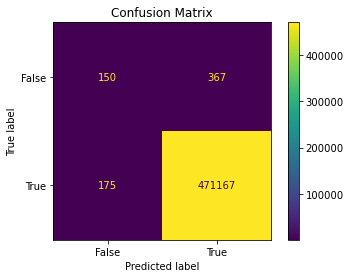


For KNeighborsClassifier, Accuracy score is 0.9993428307445903 

              precision    recall  f1-score   support

       Fraud       0.80      0.52      0.63       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.90      0.76      0.81    471859
weighted avg       1.00      1.00      1.00    471859



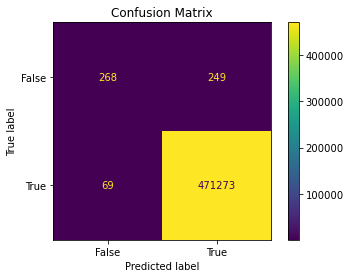


For DecisionTreeClassifier, Accuracy score is 0.9996167960410961 

              precision    recall  f1-score   support

       Fraud       0.86      0.79      0.83       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.93      0.90      0.91    471859
weighted avg       1.00      1.00      1.00    471859



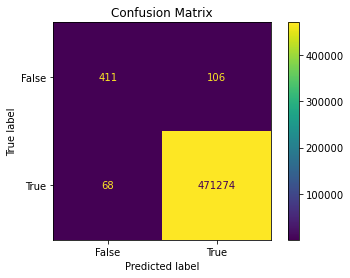


For RandomForestClassifier, Accuracy score is 0.9997745857880312 

              precision    recall  f1-score   support

       Fraud       0.97      0.78      0.87       517
    No Fraud       1.00      1.00      1.00    471342

    accuracy                           1.00    471859
   macro avg       0.99      0.89      0.93    471859
weighted avg       1.00      1.00      1.00    471859



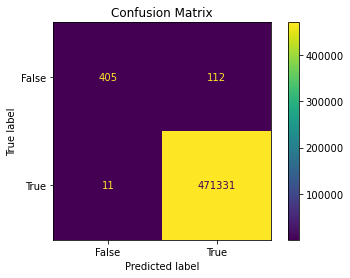

In [39]:
for model in models:
    trainer_mcv(model,X_train,y_train)
    

## Result Interpretation

Like in the first set of results, the Random Forest Classifier has the highest accuracy, precision and second highest recall score, falling behind Decision Tree by 1%. These scores remain constant in both evaluations and this is a good sign of the reliability of our model. As mentioned before, a 1% difference does not qualify Decision Tree as the better model because considering all three metrics, Random Forest is far ahead with an 11% difference in precision score and a slightly higher accuracy score.

Recall would be the most important metric for choosing the right model because as our problem definition hints, we need to be as accurate as possible to ensure our customer funds are highly secured. This means our model must consider all relevant factors and this is what Recall shows us.

In terms of confusion matrix, both False negatives and True positives are important to consider as we aim for 100% accuracy wherever possible.

## Conclusion
As described, the best performing model is the Random Forest Classifier. Towards solving the problem at hand, Blossom bank should deploy this model to the production team. The next steps would require using the model to find out the most important columns and features from the data the IT security team should focus on when detecting fraud.